In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

#from tensorflow.keras.optimizers import Adam

workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Dataset//EDC11K_Znorm"


In [3]:
dataset = np.load(workdir + "//191204_EDC11K_z_norm_minmax.npz")
ss0 = np.load(workdir + '//191204_EDC11K_z_norm_minmax_r0_9_1.npz')

In [4]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [6]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 42


In [7]:
x.shape

(11360, 21313)

In [8]:
training_image_array.shape

(10224, 21313)

In [9]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 21313) (10224,) (1136, 21313) (1136,)


In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313)
10224 train samples
1136 test samples


In [13]:
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(train_X,train_y)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-05 18:00:16.997891
[18:00:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2019-12-05 18:12:56.211324


In [14]:
test_eval = model.score(test_X,test_y)

In [15]:
test_eval

0.7697432830807116

In [16]:
predicted_classes = model.predict(test_X)

In [17]:
predicted_value = predicted_classes

In [18]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EDC-11K//XGB"
c.to_csv(workdir + '//191205_EDC_11K_znorm_minmax_XGB_result.csv')

In [20]:
c

,Predicted,Test
0,1.818669,1.393330
1,2.131578,2.079442
2,0.940804,0.308173
3,1.761451,2.079442
4,1.466242,2.079442
5,1.115557,1.270682
6,1.862047,2.079442
7,1.416550,1.674144
8,1.982847,2.079442
9,1.904753,2.079442


In [26]:
import pickle
from sklearn.externals import joblib
joblib.dump(model, workdir + '//191205_EDC_11K_znorm_minmax_XGB_model.pkl') 


['D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EDC-11K//XGB//191205_EDC_11K_znorm_minmax_XGB_model.pkl']

In [27]:
clf_from_joblib = joblib.load(workdir + '//191205_EDC_11K_znorm_minmax_XGB_model.pkl') 
clf_from_joblib.predict(test_X)

[19:32:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([1.8186686, 2.1315782, 0.9408035, ..., 1.6790308, 1.4743292,
       2.1286368], dtype=float32)

In [21]:
predicted_value.shape

(1136,)

In [22]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7383013414897265, intercept=0.23591822481258018, rvalue=0.8781951080954935, pvalue=0.0, stderr=0.01194094875499137)

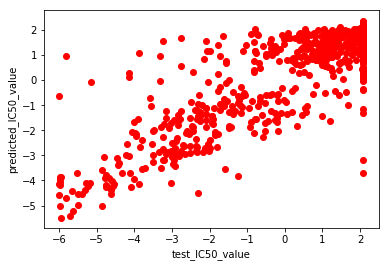

In [23]:
import matplotlib
from matplotlib import pyplot as plt
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191010_EDC_11k_XGB_val_scatter.png')

In [24]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.9695897637360253
